In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [22]:
# for Coefficient of Determination function
def cd(y_predicted, y_test):
    u = ((y_test - y_predicted) ** 2).sum()
    v = ((y_test - y_test.mean()) ** 2).sum()
    return (1 - u/v)

In [23]:
# step_gradient function
def step_gradient(data, y_train, learning_rate, m):
    # break data into x and y
    m_slope = np.zeros(5)
    #c_slope = 0
    M = len(data)
    for i in range(M):
        x = data[i, 0:5]
        y = y_train[i]
        ans = 0
        # use one more loop to loop over each m value
        for j in range(5):
            #m_slope[j] += (-2 / M) * (y - m[j] * x[j] - m[size]) * x[j]
            #c_slope += (-2 / M) * (y - m[j] * x[j] - m[size]) 
            ans += x[j] * m[j]
        for k in range(5):
            m_slope[k] += (-2 / M) * (y - ans) * x[k]
    new_m = m - learning_rate * m_slope
    return new_m

In [24]:
# gradient descent:
def gd(data, learning_rate, iterations):
    # create the m array including c which means m[size] = c
    m = np.zeros(5)
    y_train = data[:, 5]
    #print("Y train: ", y_train)
    for i in range(iterations):
        m = step_gradient(data, y_train, learning_rate, m)
    return m    

In [27]:
def run():
    #print(X)
    train_data = np.genfromtxt("GDProject2_train.csv", delimiter = ",")
    iterations = 1000000
    learning_rate = 0.0001
    scaler = preprocessing.StandardScaler()
    X = train_data[:, 0:5]
    #print("X: ", X)
    scaler.fit(X)
    X = scaler.transform(X)
    train_data[:, 0:5] = X
    Y = train_data[:, 5]
    print(train_data)
    print(train_data.shape)
    print(X.shape)
    print(Y.shape)
    M = gd(train_data, learning_rate, iterations)
    m = M[0:4]
    c = M[4]
    print(m)
    print(c)
    Y_train_predicted = np.zeros(train_data.shape[0])
    print(Y_train_predicted.shape)
    for i in range(train_data.shape[0]):
        temp = 0
        x = X[i, 0:5]
        for j in range(5):    
            temp += (M[j] * x[j])
        Y_train_predicted[i] += (temp)      
    np.savetxt("Y_GDProject2_train_predicted.csv", Y_train_predicted, fmt = "%0.5f", delimiter=",")
    a = np.arange(0 , 7176*50, 50)
    plt.scatter(a, Y, color="blue")
    plt.scatter(a, Y_train_predicted, color="red")
    plt.show()
    # for testing data
    test_data = np.genfromtxt("GDProject2_test.csv", delimiter = ",")
    test_data = scaler.transform(test_data)
    Y_test_predicted = np.zeros(test_data.shape[0])
    #Y_train_predicted = M * test_data
    print(Y_test_predicted.shape)
    for i in range(test_data.shape[0]):
        temp = 0
        x = test_data[i, 0:5]
        for j in range(5):    
            temp += (M[j] * x[j])
        Y_test_predicted[i] += (temp)
    np.savetxt("Y_GDProject2_test_predicted.csv", Y_test_predicted, fmt = "%0.1f", delimiter=",")
    score_train = cd(Y_train_predicted, Y)
    print(score_train)

[[-1.47827466e+00 -1.24764165e+00  1.30221067e+00  7.58624590e-01
   0.00000000e+00  4.82260000e+02]
 [ 2.89012041e-01  3.06797549e-01  6.61749044e-01 -4.46921842e-01
   0.00000000e+00  4.46940000e+02]
 [-3.99975582e-01 -4.21012529e-01 -2.87207194e-01  3.75010552e-01
   0.00000000e+00  4.52560000e+02]
 ...
 [ 1.36062192e+00  1.18048335e+00 -6.54382840e-01 -5.83682640e-01
   0.00000000e+00  4.37650000e+02]
 [-4.36097263e-01  9.29089763e-04  7.84140927e-01 -6.59584883e-01
   0.00000000e+00  4.59970000e+02]
 [ 1.40209496e+00  6.07960340e-01 -4.31394890e-01 -1.73110573e+00
   0.00000000e+00  4.44420000e+02]]
(7176, 6)
(7176, 5)
(7176,)
[-14.90272934  -2.8942782    0.34973996  -2.34230171]
0.0
(7176,)


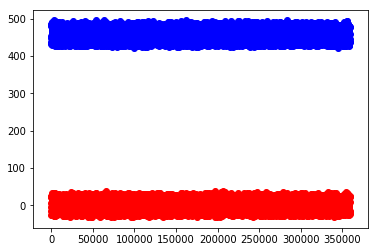

(2392,)
-702.5492128308332


In [28]:
run()